In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import accumulate

In [4]:
#Loading user profile dataset
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
user_profile_df = pd.read_csv(user_profile_url)
user_profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [5]:
user_profile_df.shape

(33901, 15)

In [6]:
feature_names = list(user_profile_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [7]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [8]:
features = user_profile_df.loc[:, user_profile_df.columns != 'user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,3.0,3.0,3.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,3.0
33897,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33898,3.0,6.0,6.0,0.0,0.0,14.0,0.0,9.0,0.0,0.0,3.0,0.0,0.0,0.0
33899,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


In [97]:
#Kmeans
def elbow_method_kmeans(data):
  inertia = []
  list_num_clusters = list(range(1,31))
  for clusters in list_num_clusters:
    km = KMeans(n_clusters = clusters, random_state= 123)
    km.fit(features)
    inertia.append(km.inertia_)

  plt.plot(list_num_clusters, inertia)
  plt.scatter(list_num_clusters, inertia)
  plt.xlabel('Numer of clusters')
  plt.ylabel('Sum of squared distances')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

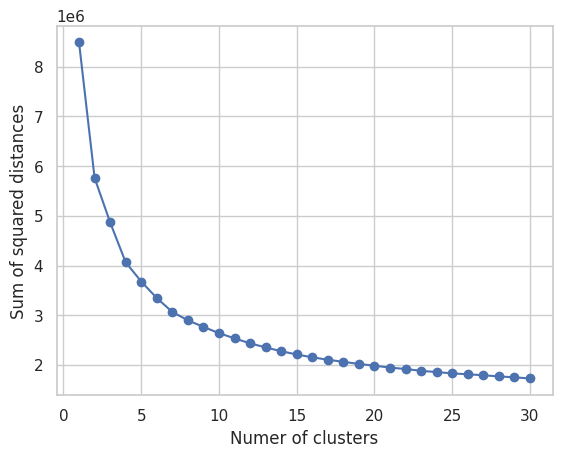

In [98]:
elbow_method_kmeans(features)

In [20]:
#Kmeans
km = KMeans(n_clusters = 20, random_state= 123)
km.fit(features)
cluster_labels = km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
def combine_cluster_labels(labels, user_ids):
  labels_df  = pd.DataFrame(labels)
  cluster_df = pd.merge(user_ids, labels_df, left_index = True, right_index = True)
  cluster_df.columns = ['user','cluster']
  return cluster_df

In [28]:
clusters_no_pca = combine_cluster_labels(cluster_labels, user_ids)
clusters_no_pca

,user,cluster
0,2,6
1,4,3
2,5,12
3,7,0
4,8,5
...,...,...
33896,2102054,11
33897,2102356,0
33898,2102680,8
33899,2102983,0


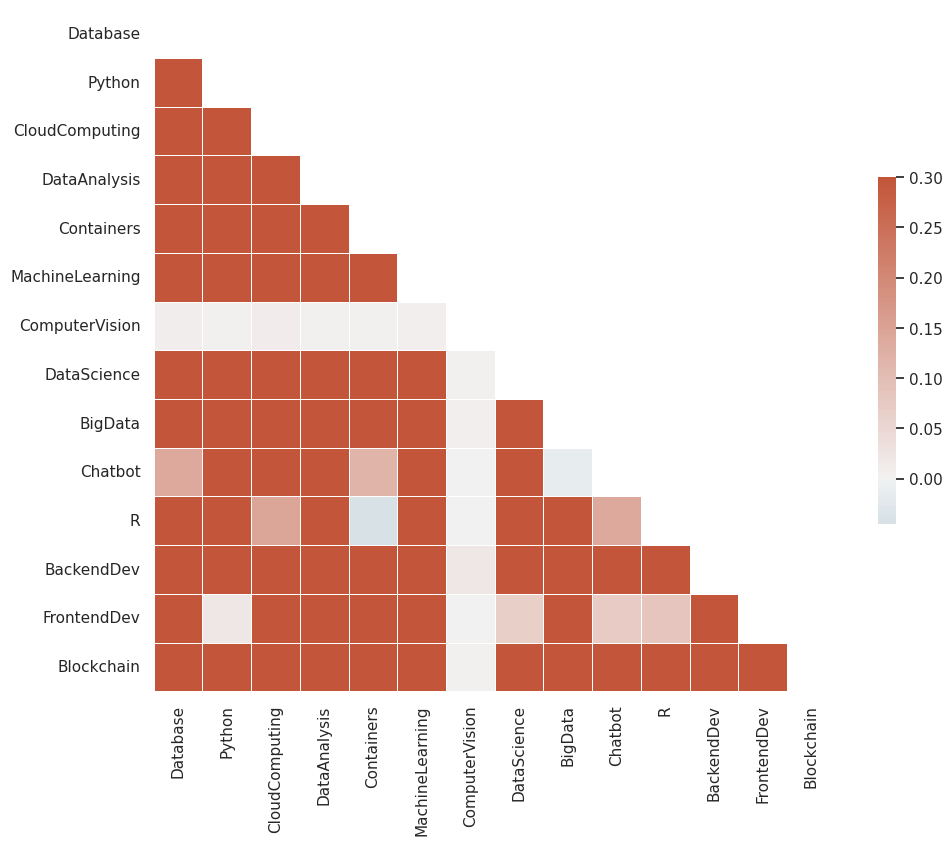

In [29]:
#Applying PCA
#Getting correlation matrix
sns.set_theme(style = 'white')
corr = features.cov()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax=0.3, center = 0, square = True, linewidth = 0.5, cbar_kws ={'shrink': 0.5})
plt.show()

In [75]:
pca = PCA()
pca.fit(features)
acc = [*accumulate(pca.explained_variance_ratio_)]
idx = range(len(acc))
acc_variance_df = pd.DataFrame(list(zip(idx,acc)))
acc_variance_df = acc_variance_df.rename(columns = {0:'Number of components', 1:'Accumulated Explained Variance'})

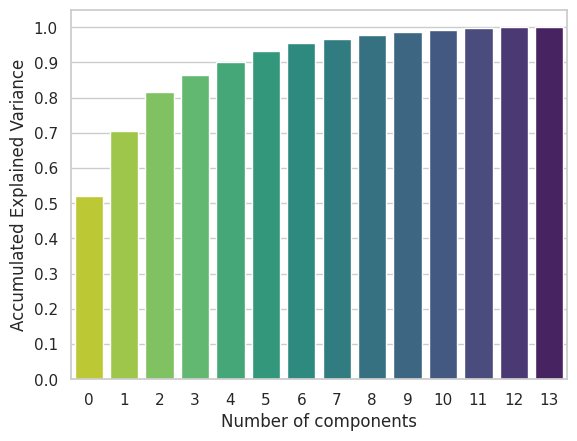

In [90]:
sns.set_style('whitegrid')
bplot = sns.barplot(x = 'Number of components', y = 'Accumulated Explained Variance', data=acc_variance_df, palette = 'viridis_r')
bplot.set_yticks(np.arange(0,1.1,0.1))

In [77]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc, alpha = 0.5)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

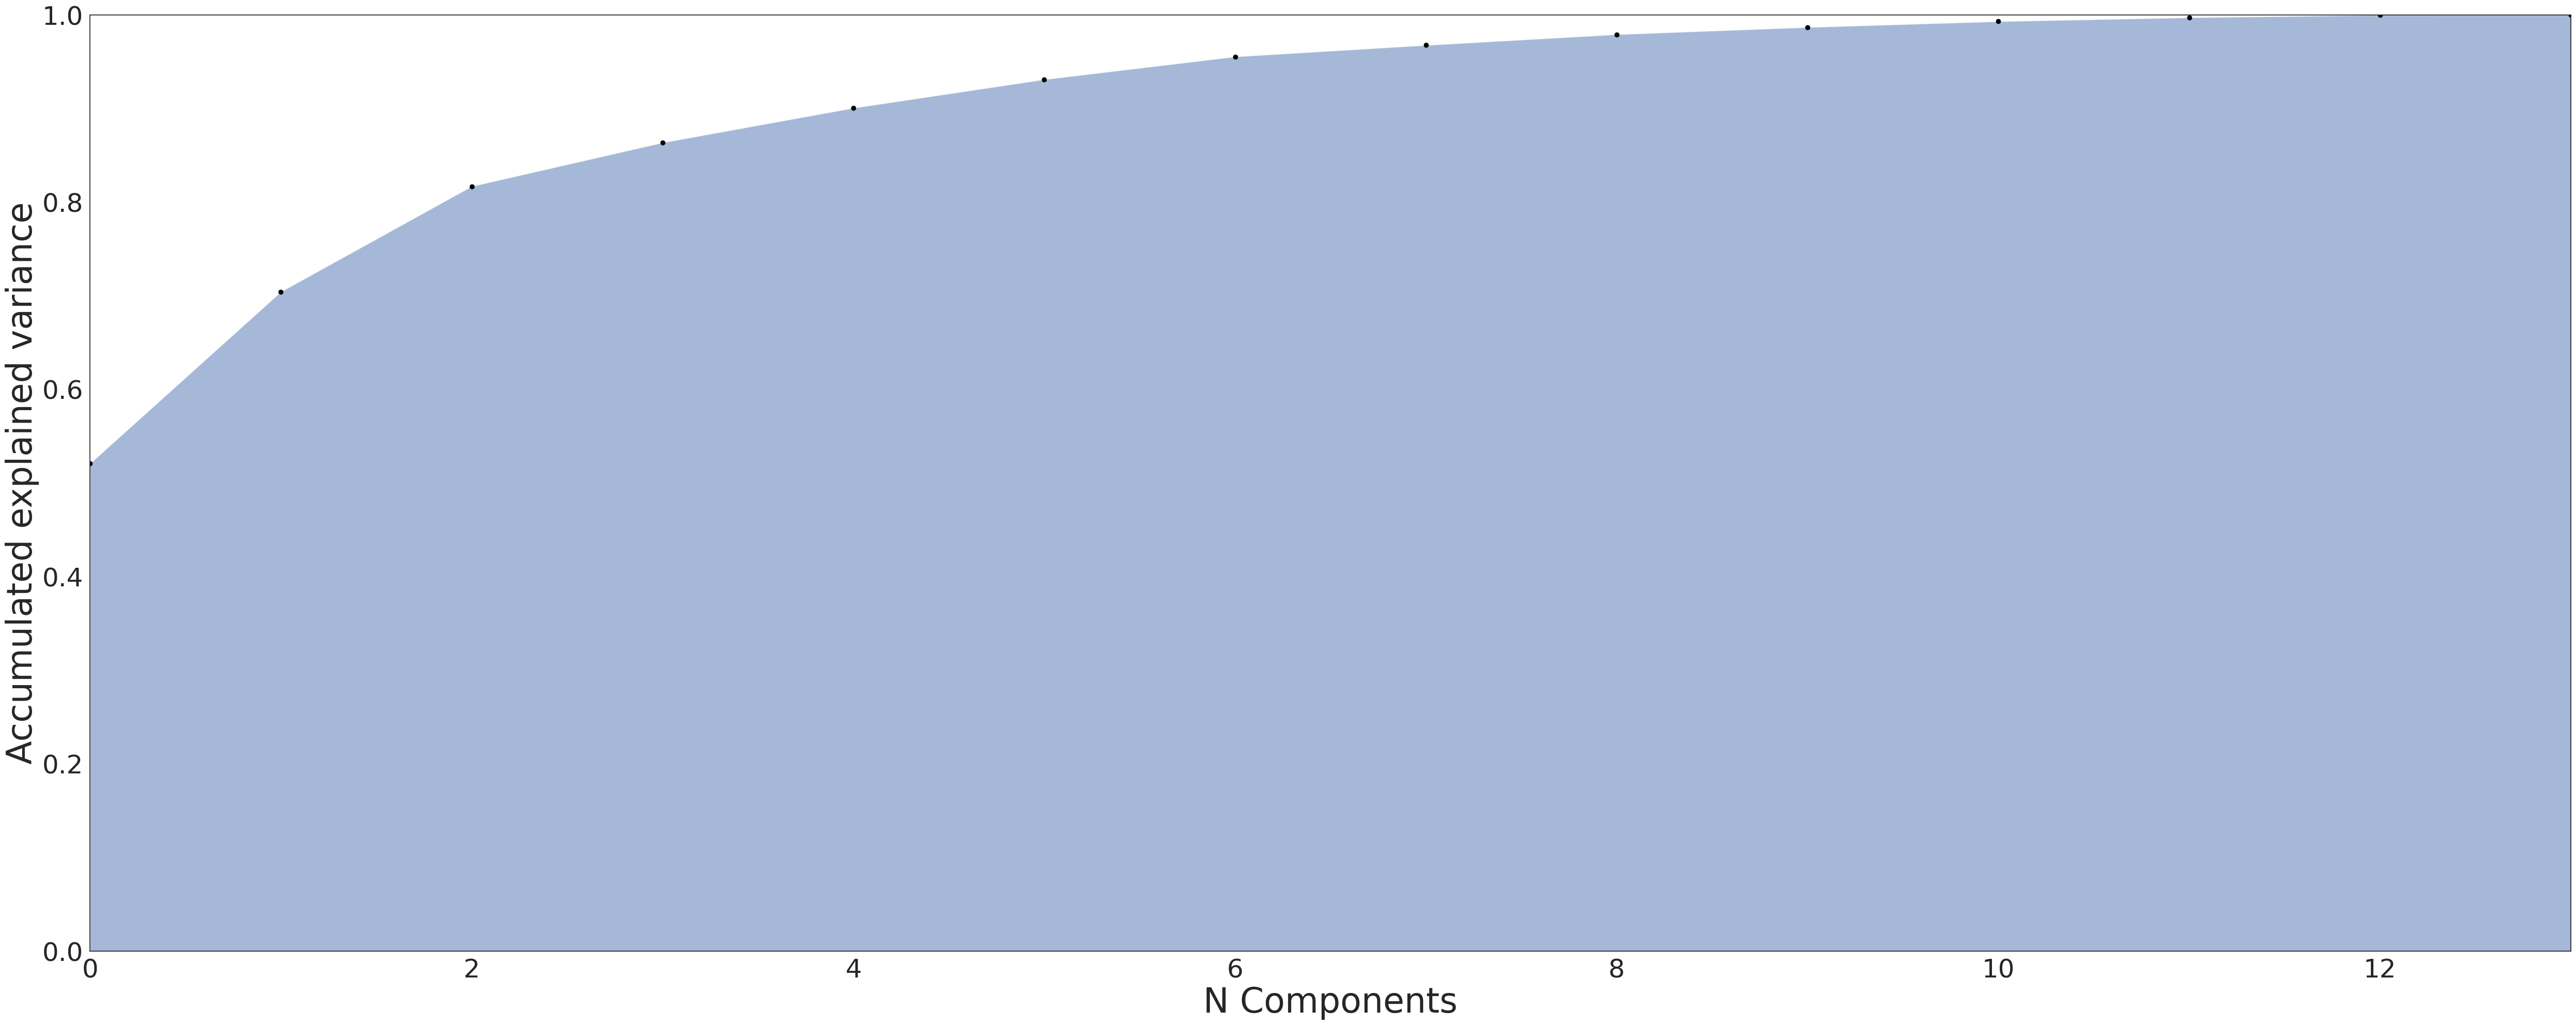

In [78]:
plot_explained_variance(pca)

In [95]:
#Selecting 4 components to expalin 90% of the variance
pca_n4 = PCA(n_components = 4)
features_pca = pca_n4.fit_transform(features)
features_pca_df = pd.DataFrame(features_pca)
user_features_pca_df = pd.merge(user_ids, features_pca_df, left_index = True, right_index=True)
user_features_pca_df

,user,0,1,2,3
0,2,83.242594,21.268733,13.184635,6.516740
1,4,47.649108,3.856697,-3.760511,-3.264859
2,5,39.153539,24.841001,20.344551,3.867600
3,7,-7.145870,-4.792730,-1.917473,1.451449
4,8,-1.397531,-6.452396,-2.655174,1.463500
...,...,...,...,...,...
33896,2102054,-3.013328,2.819388,2.489410,-2.400027
33897,2102356,-10.167148,-3.960388,-0.269062,0.796376
33898,2102680,-2.326690,9.616341,0.733247,2.397999
33899,2102983,-9.852548,-3.269669,-1.371372,2.321200


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

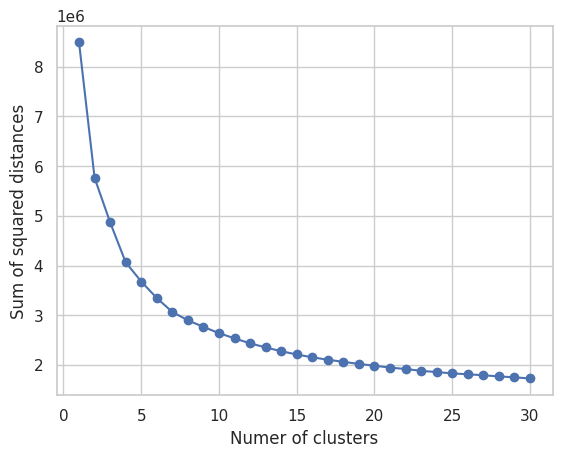

In [99]:
#Kmeans PCA
elbow_method_kmeans(features_pca_df)

In [102]:
#Kmeans PCA n_components = 4
km_pca_4 = KMeans(n_clusters = 20, random_state= 123)
km_pca_4.fit(features_pca_df)
cluster_labels_pca = km.labels_
clusters_pca_4 = combine_cluster_labels(cluster_labels_pca, user_ids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [103]:
clusters_pca_4

,user,cluster
0,2,7
1,4,24
2,5,14
3,7,4
4,8,20
...,...,...
33896,2102054,1
33897,2102356,4
33898,2102680,15
33899,2102983,4


In [104]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_user_url)[['user', 'item']]
test_users_df.head()

,user,item
0,1502801,RP0105EN
1,1609720,CNSC02EN
2,1347188,CO0301EN
3,755067,ML0103EN
4,538595,BD0115EN


In [107]:
test_users_labelled = pd.merge(test_users_df, clusters_no_pca, left_on='user', right_on='user')

In [108]:
test_users_labelled

,user,item,cluster
0,1502801,RP0105EN,9
1,1502801,BD0131EN,9
2,1502801,BD0212EN,9
3,1502801,BD0115EN,9
4,1502801,BD0211EN,9
...,...,...,...
9397,630511,BD0121EN,5
9398,630511,SC0101EN,5
9399,630511,BD0111EN,5
9400,630511,BD0115EN,5


In [228]:
courses_cluster = test_users_labelled[['item', 'cluster']]
courses_cluster['count'] = [1] * len(courses_cluster)
courses_cluster = courses_cluster.groupby(['cluster','item']).agg(enrollments = ('count','sum')).reset_index()
courses_cluster = courses_cluster.sort_values(['cluster','enrollments'], ascending=False)

In [229]:
courses_cluster

,cluster,item,enrollments
1149,19,DA0101EN,79
1171,19,PY0101EN,78
1159,19,DV0101EN,66
1164,19,ML0101ENv3,47
1152,19,DS0101EN,32
...,...,...,...
59,0,HCC105EN,1
60,0,IT0101EN,1
65,0,LB0109ENv1,1
81,0,OS0101EN,1


In [230]:
courses_cluster[courses_cluster['cluster']==0]

,cluster,item,enrollments
46,0,DS0101EN,73
3,0,BD0101EN,64
83,0,PY0101EN,62
72,0,ML0115EN,50
84,0,RP0101EN,47
...,...,...,...
59,0,HCC105EN,1
60,0,IT0101EN,1
65,0,LB0109ENv1,1
81,0,OS0101EN,1


In [214]:
#Recommending unseen courses to test users based on the popular courses in his/her cluster
def course_recommendation(test_users_labelled, courses_cluster):
  courses = []
  enrollments = []
  users = []
  res_dict = {}
  test_user_list = set(test_users_labelled['user'].to_list())
  for user in test_user_list:
    tuser_df = test_users_labelled[test_users_labelled['user']==user]
    tuser_courses = tuser_df['item'].to_list()
    tuser_cluster = tuser_df['cluster'].iloc[0]
    all_cluster_courses = test_users_labelled[test_users_labelled['cluster']==tuser_cluster]['item'].to_list()
    unseen_courses = set(all_cluster_courses).difference(set(tuser_courses))
    tuser_courses_cluster = courses_cluster[courses_cluster['cluster'] == tuser_cluster]
    enrollment_mean_cluster = tuser_courses_cluster['enrollments'].mean()

    for course in unseen_courses:

      course_enrollment = courses_cluster[(courses_cluster['item'] == course) & (courses_cluster['cluster'] == tuser_cluster)]['enrollments'].iloc[0]
      if course_enrollment > enrollment_mean_cluster:
        courses.append(course)
        users.append(user)
        enrollments.append(course_enrollment)

  res_dict['USER'] = users
  res_dict['COURSE_ID'] = courses
  res_dict['ENROLLMENTS'] = enrollments
  res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'ENROLLMENTS'])
  res_df = res_df.sort_values(['USER','ENROLLMENTS'], ascending=False)
  return res_df


In [222]:
gen_recommendations = course_recommendation(test_users_labelled, courses_cluster)
gen_recommendations

,USER,COURSE_ID,ENROLLMENTS
4078,2087663,CO0301EN,18
4083,2087663,CO0201EN,15
4073,2087663,BD0111EN,14
4072,2087663,CO0401EN,13
4075,2087663,ML0101ENv3,11
...,...,...,...
3280,37465,CB0103EN,9
3283,37465,DB0101EN,9
3278,37465,CC0103EN,8
3279,37465,ML0101ENv3,8


In [223]:
#Average number of courses recommended by user
gen_recommendations.shape[0]/len(set(test_users_labelled['user'].to_list()))

11.824

In [224]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)

In [225]:
#Top 10 recommended courses
top_10_recommeded = gen_recommendations.groupby('COURSE_ID').size().sort_values(ascending = False).nlargest(10)
id_top_10 = top_10_recommeded.index
course_df[course_df['COURSE_ID'].isin(id_top_10)]['TITLE']

81                           blockchain essentials
106                                 statistics 101
147                                   big data 101
150    docker essentials  a developer introduction
156                         build your own chatbot
158                   machine learning with python
176                   introduction to data science
182                          introduction to cloud
188                        python for data science
191               sql and relational databases 101
Name: TITLE, dtype: object